# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Boltzmann" data-toc-modified-id="Boltzmann-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boltzmann</a></div><div class="lev2 toc-item"><a href="#Pentose-phosphate-+-Glycolysis-+-TCA-cycle" data-toc-modified-id="Pentose-phosphate-+-Glycolysis-+-TCA-cycle-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pentose phosphate + Glycolysis + TCA cycle</a></div><div class="lev2 toc-item"><a href="#Regulation" data-toc-modified-id="Regulation-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regulation</a></div><div class="lev2 toc-item"><a href="#Turning-on-Regulation-and-Setting-Enzyme-Levels" data-toc-modified-id="Turning-on-Regulation-and-Setting-Enzyme-Levels-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Turning on Regulation and Setting Enzyme Levels</a></div><div class="lev1 toc-item"><a href="#Models-and-Simulations" data-toc-modified-id="Models-and-Simulations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models and Simulations</a></div><div class="lev2 toc-item"><a href="#Model-Without-Regulation" data-toc-modified-id="Model-Without-Regulation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model Without Regulation</a></div><div class="lev3 toc-item"><a href="#Run-Deterministic-Simulation" data-toc-modified-id="Run-Deterministic-Simulation-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Run Deterministic Simulation</a></div><div class="lev4 toc-item"><a href="#Generate-standard-chemical-potential-from-logfile-for-Mentos" data-toc-modified-id="Generate-standard-chemical-potential-from-logfile-for-Mentos-2111"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>Generate standard chemical potential from logfile for Mentos</a></div><div class="lev4 toc-item"><a href="#Boundary-metabolites-for-MENTOS" data-toc-modified-id="Boundary-metabolites-for-MENTOS-2112"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Boundary metabolites for MENTOS</a></div><div class="lev3 toc-item"><a href="#Derivatives-from-ODE-thermodynamic-optimization-simulation" data-toc-modified-id="Derivatives-from-ODE-thermodynamic-optimization-simulation-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Derivatives from ODE thermodynamic optimization simulation</a></div><div class="lev3 toc-item"><a href="#Likelihoods-from-Deterministic-Simulation" data-toc-modified-id="Likelihoods-from-Deterministic-Simulation-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Likelihoods from Deterministic Simulation</a></div><div class="lev3 toc-item"><a href="#Analyze-Metabolite-Levels-from-Deterministic-Simulation" data-toc-modified-id="Analyze-Metabolite-Levels-from-Deterministic-Simulation-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Analyze Metabolite Levels from Deterministic Simulation</a></div><div class="lev2 toc-item"><a href="#Infer-Regulated-Reactions" data-toc-modified-id="Infer-Regulated-Reactions-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Infer Regulated Reactions</a></div><div class="lev2 toc-item"><a href="#Calculate-Rate-Constants" data-toc-modified-id="Calculate-Rate-Constants-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calculate Rate Constants</a></div>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import re
import os
from IPython.core.display import display
pd.set_option('display.max_columns', None,'display.max_rows', None)
#from ipynb_latex_setup import *
%matplotlib inline
#%matplotlib pdf
#matplotlib.matplotlib_fname()
#import matplotlib.rcsetup as rcsetup
#print(rcsetup.all_backends)

# Boltzmann
## Pentose phosphate + Glycolysis + TCA cycle
Reactions:

In [28]:

!grep PDHm -A 9 neurospora_pentose_phos.glycolysis.tca.2.dat

REACTION	PDHm
LEFT	COA + NAD+ + PYRUVATE
RIGHT	ACETYL-COA + CO2 + NADH
LEFT_COMPARTMENT	MITOCHONDRIA
RIGHT_COMPARTMENT	MITOCHONDRIA
ENZYME_LEVEL	1.0
NREGULATION	ACETYL-COA 1.00e-03 20
PATHWAY	ACETYL COA BIOSYNTHESIS
COMMENT	PYRUVATE DEHYDROGENASE SUMMARY REACTION
//


## Regulation
Notice that in the last reaction (PDH) the line

NREGULATION ACETYL-COA 1.00e-03 20.0

The keyword NREGULATION is for negative regulation using a Hill Function with constant = 6.1e-04 and an exponent of 20.0
$$Activity = \frac{K^{n}}{K^{n} + X^{n}}$$

where K is the constant similar to the Michaelis constant, n is the exponent that controls the steepness of the Hill function and $X$ is the concentration of the species that regulates the activity. The Hill function is used to update the activity of the enzyme as follows:

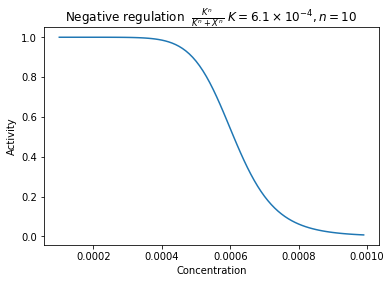

In [29]:
constant = 6.1e-04
exponent = 10
constant_pow_exponent = np.exp(exponent*np.log(constant))

concentration = np.arange(1.0e-4, 1.0e-3, 1.0e-5)
concentration_pow_exponent = np.exp(np.multiply(exponent,np.log(concentration)))

activity = np.divide(constant_pow_exponent,(constant_pow_exponent + concentration_pow_exponent))
plt.plot(concentration,activity)
plt.xlabel('Concentration')
plt.ylabel('Activity')
plt.title(r'Negative regulation  $\frac{K^n}{K^n + X^n}\ K=6.1\times 10^{-4}, n=10$')
plt.show()


Likewise, positive regulation is done using the comparable Hill Function,
$$Activity = \frac{X^{n}}{K^{n} + X^{n}}$$.
Positive regulation is indicated in the Boltzmann .dat file with keyword PREGULATION.

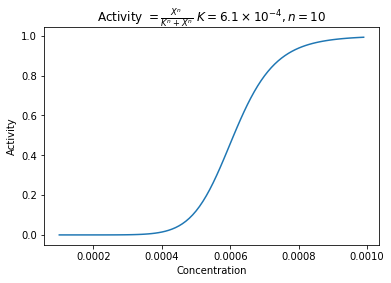

In [31]:
constant = 6.1e-04
exponent = 10
constant_pow_exponent = np.exp(exponent*np.log(constant))

concentration = np.arange(1.0e-4, 1.0e-3, 1.0e-5)
concentration_pow_exponent = np.exp(np.multiply(exponent,np.log(concentration)))

activity = np.divide(concentration_pow_exponent,(constant_pow_exponent + concentration_pow_exponent))
plt.plot(concentration,activity)
plt.xlabel('Concentration')
plt.ylabel('Activity')
plt.title(r'Activity $=  \frac{X^n}{K^n + X^n}\ K=6.1\times 10^{-4}, n=10$')
plt.show()


## Turning on Regulation and Setting Enzyme Levels
To use regulation in the simulation, this flag must be set in the .in file:

USE_REGULATION 1

If USE_REGULATION is set to 0, then the regulation information in the .dat file will be ignored.

**Reactions** can be turned on (1.0) or off (0.0) by setting the ENZYME_LEVEL feature in the .dat file for a reaction:

USE_ENZYME_LEVELS 1.0 

or

USE_ENZYME_LEVELS 0.0

**In addition, USE_ACTIVITY 1" must be set in the .in file.**

# Models and Simulations

## Model Without Regulation
### Run Deterministic Simulation

In [32]:
#args = ("/Users/d3k137/docs/projects/boltzmann/code/11112017/src/boltzmann", "neurospora_pentose_phos.glycolysis.tca_no_reg.in")
args = ("/Users/zuck016/Projects/src/boltzmann/boltzmann", "neurospora_pentose_phos.glycolysis.tca_no_reg.in")

popen = subprocess.Popen(args, stdout=subprocess.PIPE)
popen.wait()
output = popen.stdout.read()
print(output)

b''


In [33]:
!ls -l

total 9544
-rw-r--r--  1 2020279912  2016721313    10498 Jan  3 15:17 MENTOS_comparison_with_boltzmann_on_neurospora.ipynb
-rw-r--r--  1 2020279912  2016721313   421262 Jan 10 11:42 neurospora_no_regulation.ipynb
-rwxr-xr-x@ 1 2020279912  2016721313     8980 Jan  3 11:40 neurospora_pentose_phos.glycolysis.tca.2.dat
-rw-r--r--  1 2020279912  2016721313    26745 Jan  3 13:07 neurospora_pentose_phos.glycolysis.tca.2.json
-rw-r--r--  1 2020279912  2016721313     4516 Jan 10 11:43 neurospora_pentose_phos.glycolysis.tca.2_no_reg.concs
-rw-r--r--  1 2020279912  2016721313     4520 Jan 10 11:43 neurospora_pentose_phos.glycolysis.tca.2_no_reg.count
-rw-r--r--  1 2020279912  2016721313     3722 Jan 10 11:42 neurospora_pentose_phos.glycolysis.tca.2_no_reg.dg0ke
-rw-r--r--  1 2020279912  2016721313     2506 Jan 10 11:42 neurospora_pentose_phos.glycolysis.tca.2_no_reg.dict
-rw-r--r--  1 2020279912  2016721313     9311 Jan 10 11:42 neurospora_pentose_phos.glycolysis.tca.2_no_reg.echo
-rw-r--r--  1 2

#### Generate standard chemical potential from logfile for Mentos

In [44]:
%%bash
head -67 neurospora_pentose_phos.glycolysis.tca.2_no_reg.log | tail -64 > neurospora_pentose_phos.glycolysis.tca.2.mu0
cat neurospora_pentose_phos.glycolysis.tca.2.mu0

index of molecule in sorted_molecules 	molecule name	 deltaG0_tf(kJ/mol)
0 	 (S)-MALATE 	 -682.859219 
1 	 2-PHOSPHO-D-GLYCERATE 	 -1341.518794 
2 	 3-PHOSPHO-D-GLYCERATE 	 -1347.416642 
3 	 3-PHOSPHO-D-GLYCEROYL_PHOSPHATE 	 -2206.386288 
4 	 6-PHOSPHO-D-GLUCONATE 	 -1572.040218 
5 	 ACETALDEHYDE 	 23.603348 
6 	 ACETATE 	 -248.062505 
7 	 ADP 	 -1425.202960 
8 	 ATP 	 -2292.311889 
9 	 BETA-D-GLUCOSE 	 -424.575779 
10 	 BETA-D-GLUCOSE-6-PHOSPHATE 	 -1314.306903 
11 	 CO2 	 -386.000000 
12 	 D-ERYTHROSE-4-PHOSPHATE 	 -1162.505409 
13 	 D-FRUCTOSE_1,6-BISPHOSPHATE 	 -2206.160120 
14 	 D-FRUCTOSE_6-PHOSPHATE 	 -1316.575034 
15 	 D-GLUCONO-1,5-LACTONE_6-PHOSPHATE 	 -1376.918623 
16 	 D-GLYCERALDEHYDE-3-PHOSPHATE 	 -1088.173908 
17 	 D-RIBOSE-5-PHOSPHATE 	 -1233.075711 
18 	 D-RIBULOSE-5-PHOSPHATE 	 -1232.615711 
19 	 D-XYLULOSE 	 -339.641629 
20 	 D-XYLULOSE-5-PHOSPHATE 	 -1237.546403 
21 	 ETHANOL 	 62.265022 
22 	 GLYCERONE_PHOSPHATE 	 -1095.833908 
23 	 H2O 	 -155.888326 
24 	 LACTATE 

#### Boundary metabolites for MENTOS

In [50]:
%%bash
echo "Species	InitialConcentration	FixedOrVariable" >neurospora_pentose_phos.glycolysis.tca.2.fixed_mets
grep 'F$' neurospora_pentose_phos.glycolysis.tca.2_no_reg.rstrt | sed -e 's/^[[:space:]]*//' >> neurospora_pentose_phos.glycolysis.tca.2.fixed_mets
cat neurospora_pentose_phos.glycolysis.tca.2.fixed_mets

Species	InitialConcentration	FixedOrVariable
ADP:CYTOSOL	5.600000e-04	F
ATP:CYTOSOL	9.600000e-03	F
BETA-D-GLUCOSE:CYTOSOL	2.000000e-03	F
CO2:CYTOSOL	1.000000e-04	F
D-XYLULOSE:CYTOSOL	8.800000e-03	F
H2O:CYTOSOL	1.000000e+00	F
NAD+:CYTOSOL	2.600000e-03	F
NADH:CYTOSOL	8.300000e-05	F
NADP+:CYTOSOL	2.100000e-06	F
NADPH:CYTOSOL	1.200000e-04	F
ORTHOPHOSPHATE:CYTOSOL	2.000000e-02	F
COA:GLYOXYSOME	1.400000e-03	F
H2O:GLYOXYSOME	1.000000e+00	F
ADP:MITOCHONDRIA	5.600000e-04	F
ATP:MITOCHONDRIA	9.600000e-03	F
CO2:MITOCHONDRIA	1.000000e-04	F
COA:MITOCHONDRIA	1.400000e-03	F
H2O:MITOCHONDRIA	1.000000e+00	F
NAD+:MITOCHONDRIA	2.600000e-03	F
NADH:MITOCHONDRIA	8.300000e-05	F
NADP+:MITOCHONDRIA	2.100000e-06	F
NADPH:MITOCHONDRIA	1.200000e-04	F
ORTHOPHOSPHATE:MITOCHONDRIA	2.000000e-02	F
REDOX1:MITOCHONDRIA	1.000000e-03	F
REDOX2:MITOCHONDRIA	1.000000e-03	F


### Derivatives from ODE thermodynamic optimization simulation

In [55]:
 # Read boltzmann stochastic reaction likelihoods
#ode_derivatives = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_no_reg.ode_dconcs',header=0,index_col=0)
ode_derivatives = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_no_reg.rstrt',header=None,skiprows=2)
ode_derivatives

,0,1,2
0,(S)-MALATE:CYTOSOL,9.372193e+02,V
1,2-PHOSPHO-D-GLYCERATE:CYTOSOL,2.038265e+00,V
2,3-PHOSPHO-D-GLYCERATE:CYTOSOL,1.802059e+02,V
3,3-PHOSPHO-D-GLYCEROYL_PHOSPHATE:CYTOSOL,9.484024e+02,V
4,6-PHOSPHO-D-GLUCONATE:CYTOSOL,3.279158e+08,V
5,ACETALDEHYDE:CYTOSOL,8.998973e-15,V
6,ACETATE:CYTOSOL,1.618349e+05,V
7,ADP:CYTOSOL,5.600000e-04,F
8,ATP:CYTOSOL,9.600000e-03,F
9,BETA-D-GLUCOSE:CYTOSOL,2.000000e-03,F


In [56]:
#column_names = [x.split(":")[0] for x in ode_metabolites.columns]
#column_names = [x.split(":")[0] for x in ode_metabolites.columns]
#ode_metabolites.columns = column_names
abs_ode_derivatives = np.abs(ode_derivatives[0])
derivatives = np.abs(ode_derivatives.iloc[-1,:])
temp = derivatives.sort_values()
display(temp)
plt.figure();abs_ode_derivatives.iloc[-10].plot(legend=False,logx=True,logy=False,figsize=(10, 10))
plt.yscale('symlog')
#plt.legend(bbox_to_anchor=(1.35, 1.05),bbox_transform=plt.gcf().transFigure)

TypeError: bad operand type for abs(): 'str'

### Likelihoods from Deterministic Simulation

ME1m                    0.000000
ME2m                    0.000000
CSm                     1.422995
ACONTm                  6.703336
ICDHxm                  6.582378
AKGDam                  6.582380
SUCOASm                 6.703342
SUCD1m                  6.703339
FUMm                    6.703335
MDHm                    6.554164
GAPD                    8.056549
PGK                     8.056558
TPI                     4.204069
MDH                     0.000000
PEP_Carboxylase         0.000000
PPCK                    0.000000
FBA                     4.204069
FBP                     0.000000
TKT2                    0.000000
RPE                     0.000000
Xylulokinase            0.000000
PYK_org                 0.000000
PYK                     8.056558
RPI                     0.000000
TKT1                    0.000000
TALA                    0.000000
PGM                     8.056558
ENO                     8.056558
GND                     0.000000
PGL                     0.000000
HEX       

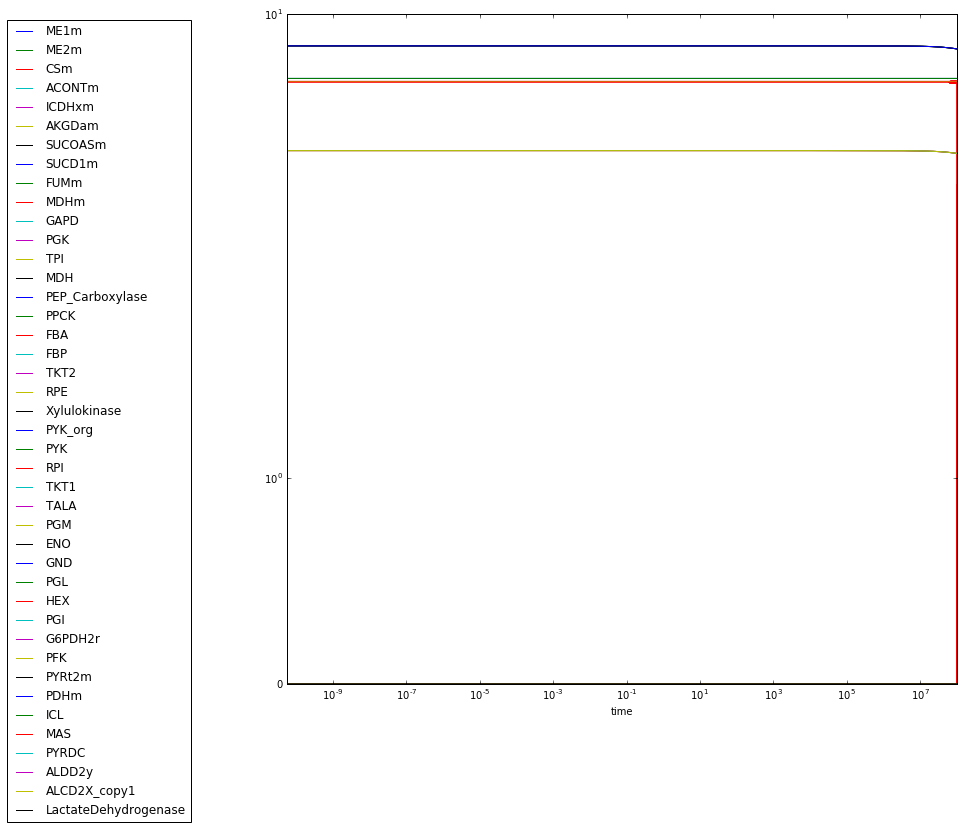

In [11]:
# Read boltzmann ODE reaction likelihoods
os.chdir('/Users/d3k137/docs/projects/boltzmann/code//06212017/run/pentose_phos.glycolysis.tca')
columns = np.arange(1,56,1)
fwd_column_idx = [x for x in np.arange(0,54,2)]
rev_column_idx = [x for x in np.arange(1,54,2)]
#rev_columns = np.arange(0,55,2)
ode_likelihoods_timeseries = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_no_reg.ode_lklhd',header=1, index_col = 0, quoting=2)
#ode_likelihoods_timeseries = pd.read_table('head.ode_lklhd',header=1, index_col = 0, quoting=2)

temp = [x for x in ode_likelihoods_timeseries.columns if 'f_' in x]
ode_fwd_likelihoods_timeseries = ode_likelihoods_timeseries[temp]
temp = [x for x in ode_likelihoods_timeseries.columns if 'r_' in x]
ode_rev_likelihoods_timeseries = ode_likelihoods_timeseries[temp]
#ode_fwd_likelihoods_timeseries = ode_likelihoods_timeseries.iloc[:,fwd_column_idx]
#ode_rev_likelihoods_timeseries = ode_likelihoods_timeseries.iloc[:,rev_column_idx]
ode_fwd_likelihoods_timeseries.columns = [x.split("f_")[-1] for x in ode_fwd_likelihoods_timeseries.columns]
ode_rev_likelihoods_timeseries.columns = [x.split("r_")[-1] for x in ode_rev_likelihoods_timeseries.columns]
fwd_column = ode_likelihoods_timeseries.iloc[:,fwd_column_idx].columns
rev_column = ode_likelihoods_timeseries.iloc[:,rev_column_idx].columns
#column_names = [x.split("f_")[-1] for x in ode_likelihoods.columns]
#ode_likelihoods.columns = column_names

plt.figure()
#ode_likelihoods.iloc[:,rev_column_idx].plot(legend=True,logx=True,figsize=(12, 12))
#ode_fwd_likelihoods_timeseries.plot(legend=True,logx=False,figsize=(12, 12))
ode_fwd_likelihoods_timeseries.plot(legend=False,logx=True,figsize=(12, 12))
#plt.yscale('log')
plt.yscale('symlog')
plt.legend(bbox_to_anchor=(0.02, 0.9),bbox_transform=plt.gcf().transFigure)
#plt.legend(bbox_to_anchor=(1.02, 0.9),bbox_transform=plt.gcf().transFigure)
#np.log10(ode_fwd_likelihoods_timeseries.iloc[-100:]).mean()
#display(ode_fwd_likelihoods_timeseries.iloc[-100:].mean())
display(ode_fwd_likelihoods_timeseries.iloc[-10:].mean())

That teh reaction probabilities aren't all the same implies that we are not conserving mass somewhere. Could this be a bug in LR8? Does this happen when we set concentrations < 0 to be equal to 0? Or does this happen when we increment the products?

In [12]:
ode_likelihoods_steadystate = pd.DataFrame(data = ode_fwd_likelihoods_timeseries.iloc[-20:].mean(), 
                                           index = ode_fwd_likelihoods_timeseries.columns,
                                          columns =['Forward'])
ode_likelihoods_steadystate['Reverse'] = ode_rev_likelihoods_timeseries.iloc[-20:].mean()
#ode_likelihoods_steadystate['Reverse'] = ode_likelihoods_steadystate['Forward'].rdiv(1)
ode_likelihoods_steadystate['For-Rev'] = ode_likelihoods_steadystate['Forward'] - ode_likelihoods_steadystate['Reverse']
ode_likelihoods_steadystate['Rxn Probabilities'] = ode_likelihoods_steadystate['For-Rev']/np.sum(abs(ode_likelihoods_steadystate['For-Rev']))
ode_likelihoods_steadystate

,Forward,Reverse,For-Rev,Rxn Probabilities
ME1m,0.000000,0.000000e+00,0.000000,0.000000
ME2m,0.000000,0.000000e+00,0.000000,0.000000
CSm,1.548095,6.102153e-14,1.548095,0.012608
ACONTm,6.703336,1.491724e-01,6.554164,0.053378
ICDHxm,6.582378,2.821438e-02,6.554164,0.053378
AKGDam,6.582380,2.821566e-02,6.554164,0.053378
SUCOASm,6.703342,1.491781e-01,6.554164,0.053378
SUCD1m,6.703339,1.491750e-01,6.554164,0.053378
FUMm,6.703335,1.491708e-01,6.554164,0.053378
MDHm,6.554164,1.441258e-14,6.554164,0.053378


In [13]:
from escher import Builder

reaction_data = ode_likelihoods_steadystate['For-Rev'].to_dict()
#reaction_data = (ode_likelihoods_timeseries.iloc[-1]).to_dict()
#for x in reaction_data.keys():
#  y = x.split("f_")[-1]
#  reaction_data[y] = reaction_data.pop(x)
#b = Builder(map_name="e_coli_core.Core metabolism",reaction_data=reaction_data)
b = Builder(map_name="iMM904.Central carbon metabolism",reaction_data=reaction_data)
b.display_in_notebook(menu='zoom')

### Analyze Metabolite Levels from Deterministic Simulation

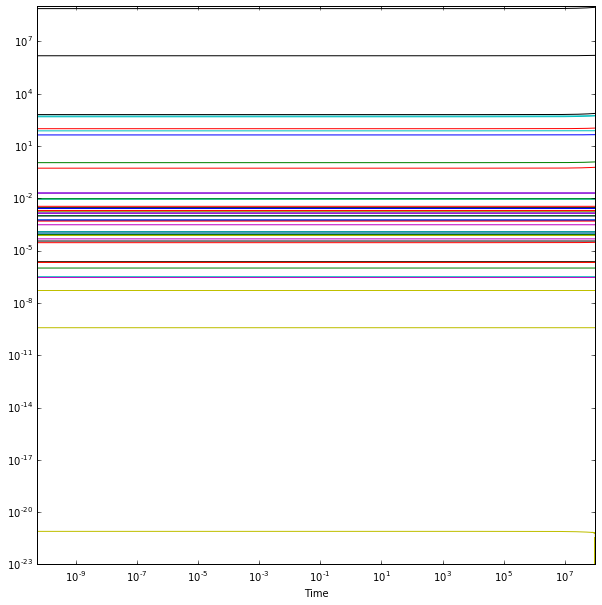

In [14]:
# Read boltzmann stochastic reaction likelihoods
ode_metabolites = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_no_reg.ode_concs',header=0,index_col=0)
#column_names = [x.split(":")[0] for x in ode_metabolites.columns]
#column_names = [x.split(":")[0] for x in ode_metabolites.columns]
#ode_metabolites.columns = column_names

fig = plt.figure();
plot = ode_metabolites.plot(legend=False,logy=True,logx=True,figsize=(10, 10))
fig = plot.get_figure()
fig.savefig('metabolites_no_regulation.png')
#plt.legend(bbox_to_anchor=(1.35, 0.95),bbox_transform=plt.gcf().transFigure)

In [15]:
ode_metabolites_steadystate = \
  pd.DataFrame(data = ode_metabolites.iloc[-20:,:].mean(),columns=['ODE'])
ode_metabolites_steadystate.sort_values(by=['ODE'])

,ODE
"D-GLUCONO-1,5-LACTONE_6-PHOSPHATE:CYTOSOL",0.000000e+00
LACTATE:CYTOSOL,0.000000e+00
6-PHOSPHO-D-GLUCONATE:CYTOSOL,0.000000e+00
ACETALDEHYDE:CYTOSOL,0.000000e+00
ACETATE:CYTOSOL,0.000000e+00
ETHANOL:CYTOSOL,0.000000e+00
OXALOACETATE:MITOCHONDRIA,1.568673e-22
2-OXOGLUTARATE:MITOCHONDRIA,3.787672e-10
D-ERYTHROSE-4-PHOSPHATE:CYTOSOL,5.149502e-08
D-RIBULOSE-5-PHOSPHATE:CYTOSOL,2.890365e-07


## Infer Regulated Reactions

In [16]:
ode_metabolites_steadystate['Expected'] = 1.0e-03

S = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_no_reg.mat',header=0, index_col = 0, quoting=2)
P = (S>0)
del P['forward reaction']

P = P.astype(np.float64)
#display(R)
product_concentrations = P.multiply(ode_metabolites_steadystate['ODE'],axis=1)
product_concentrations[product_concentrations == 0] = 1
product_concentrations_rxns = pd.DataFrame(data = product_concentrations.T.product(), columns=['ODE'])
expect_product_concentrations = P.multiply(ode_metabolites_steadystate['Expected'],axis=1)
expect_product_concentrations[expect_product_concentrations == 0] = 1
product_concentrations_rxns['Expected'] = (expect_product_concentrations.T).product()

s_regulation = '$\Delta S_{reg}$'
product_concentrations_rxns[s_regulation] = \
    np.log(product_concentrations_rxns['ODE']/product_concentrations_rxns['Expected'])

idx = (ode_likelihoods_steadystate['Reverse'] != 0) & (ode_likelihoods_steadystate['Forward'] != 0) & \
            (product_concentrations_rxns[s_regulation]>1)
#display(product_concentrations_rxns[product_concentrations_rxns[s_regulation]>1])
display(product_concentrations_rxns[idx].sort_values(by=s_regulation))

,ODE,Expected,$\Delta S_{reg}$
reaction title,,,
CSm,4.854577e-06,1.000000e-06,1.579922
SUCOASm,6.622142e-09,1.000000e-09,1.890419
ENO,6.009061e-01,1.000000e-03,6.398439
PGM,1.221958e+00,1.000000e-03,7.108210
HEX,4.197716e-02,1.000000e-06,10.644881
PGI,4.451045e+01,1.000000e-03,10.703479
GAPD,4.568983e-02,1.000000e-06,10.729631
PYRt2m,7.379975e+02,1.000000e-03,13.511696
PGK,1.020461e+00,1.000000e-06,13.835765


Literature on Glycolysis regulation in Neurospora

PYK: Microbios. 1975;12(49):125-42. Regulation of glycolysis in Neurospora crassa. Kinetic properties of pyruvate kinase. Tsao MU, Madley TI.

PDH: FEBS Letters, Volume 27, Issue 2, 1 November 1972, Pages 240-244 Neurospora crassa pyruvate dehydrogenase: Interconversion by phosphorylation and dephosphorylation, O.H.WielandU.HartmannE.A.Siess

PFK: BiochimicA ET BIOPHYSICA ACTA KINETIC PROPERTIES OF PHOSPHOFRUCTOKINASE OF NEUROSPORA CRASSA. Tsao MU, Madley TI.


Yeast: Oliveira, A. P., Ludwig, C., Picotti, P., Kogadeeva, M., Aebersold, R., & Sauer, U. (2012). Regulation of yeast central metabolism by enzyme phosphorylation. Molecular Systems Biology, 8, 623. http://doi.org/10.1038/msb.2012.55

## Calculate Rate Constants
For a simple reaction,
\begin{equation}
A + B \rightleftharpoons C + D,
\end{equation}
with forward rate constant $k_{-1}$, reverse rate constant $k_{-1}$ and equilibrium constant $K_{1} = \frac{k_{1}[A][B]}{k_{-1}[C][D]}$, the net flux $J_{1,net}$ is,

\begin{equation}
J_{1,net} = k_{1}[A][B] (1 - K_{-1}Q_{-1}^{-1}).
\end{equation}
So,
\begin{equation}
k_{1} = \frac{J_{1, net}}{[A][B] (1 - K_{-1}Q_{-1}^{-1})}.
\end{equation}
Since $p_{1,net} \propto J_{1,net}$,
\begin{equation}
k_{1} \propto \frac{p_{1, net}}{[A][B] (1 - K_{-1}Q_{-1}^{-1})}.
\end{equation}

In [17]:
S = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2.mat',header=0, index_col = 0, quoting=2)
P = (S<0)
del P['forward reaction']

P = P.astype(np.float64)
#display(R)
reactant_concentrations = P.multiply(ode_metabolites_steadystate['ODE'],axis=1)

reactant_concentrations[reactant_concentrations == 0] = 1
reactant_concentrations_rxns = (reactant_concentrations.T).product()
denominator = reactant_concentrations_rxns.multiply(1-ode_likelihoods_steadystate['Reverse'])

#display(ode_likelihoods_steadystate['Rxn Probabilities'].divide(denominator))
ode_likelihoods_steadystate['Fwd Rate Constants'] = ode_likelihoods_steadystate['Rxn Probabilities'].divide(denominator)
idx = (ode_likelihoods_steadystate['Fwd Rate Constants'].isnull()) 
ode_likelihoods_steadystate['Fwd Rate Constants'].loc[idx] = 0

fwd_rates = ode_likelihoods_steadystate['Fwd Rate Constants'].multiply(reactant_concentrations_rxns)
display(fwd_rates)

ACONTm                  0.062736
AKGDam                  0.054928
ALCD2X_copy1                 NaN
ALDD2y                       NaN
CSm                     0.012608
ENO                     0.073758
FBA                     0.042382
FBP                     0.000000
FUMm                    0.062736
G6PDH2r                 0.000000
GAPD                    0.073757
GND                     0.000000
HEX                          NaN
ICDHxm                  0.054928
ICL                     0.000000
LactateDehydrogenase         NaN
MAS                     0.000000
MDH                     0.000000
MDHm                    0.053378
ME1m                    0.000000
ME2m                    0.000000
PDHm                    0.073758
PEP                          NaN
PEP_Carboxylase              NaN
PFK                     0.042388
PGI                     0.042388
PGK                     0.073758
PGL                     0.000000
PGM                     0.073758
PPCK                    0.000000
PYK       

In [18]:
K_eq = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_no_reg.dg0ke',header=0, index_col = 0, quoting=2)
result = pd.concat([K_eq,ode_likelihoods_steadystate],axis=1)
result['Rev Rate Constants'] = result['Fwd Rate Constants']/result['Ke']
result['Computed Ke'] = result['Fwd Rate Constants']/result['Rev Rate Constants']
display(result)

,Reaction,Delta G0,Ke,Forward,Reverse,For-Rev,Rxn Probabilities,Fwd Rate Constants,Rev Rate Constants,Computed Ke
Rxn_title,,,,,,,,,,
ME1m,(S)-MALATE + NAD+ => PYRUVATE + NADH + CO2,7.054557,5.807996e-02,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN
ME2m,(S)-MALATE + NADP+ => PYRUVATE + NADPH + CO2,7.086582,5.733443e-02,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN
CSm,OXALOACETATE + ACETYL-COA + CITRATE + COA,-44.100080,5.326355e+07,1.548095,6.102153e-14,1.548095,0.012608,8.935514e+10,1.677604e+03,5.326355e+07
ACONTm,CITRATE => ISOCITRATE,6.648253,6.842451e-02,6.703336,1.491724e-01,6.554164,0.053378,1.809239e+01,2.644138e+02,6.842451e-02
ICDHxm,ISOCITRATE + NAD+ => 2-OXOGLUTARATE + NADH + CO2,0.783020,7.291438e-01,6.582378,2.821438e-02,6.554164,0.053378,5.968886e+05,8.186158e+05,7.291438e-01
AKGDam,2-OXOGLUTARATE + COA + NAD+ => SUCCINYL-COA + ...,-31.653450,3.513601e+05,6.582380,2.821566e-02,6.554164,0.053378,3.983980e+13,1.133874e+08,3.513601e+05
SUCOASm,SUCCINYL-COA + ADP + ORTHOPHOSPHATE => SUCCINA...,1.995839,4.470177e-01,6.703342,1.491781e-01,6.554164,0.053378,6.317641e+05,1.413287e+06,4.470177e-01
SUCD1m,SUCCINATE + REDOX1 => FUMARATE + REDOX2,0.000000,1.000000e+00,6.703339,1.491750e-01,6.554164,0.053378,1.273272e+05,1.273272e+05,1.000000e+00
FUMm,FUMARATE + (S)-MALATE,-3.611371,4.292596e+00,6.703335,1.491708e-01,6.554164,0.053378,8.535342e+02,1.988387e+02,4.292596e+00


In [19]:
#indices = ['LEFT','RIGHT','LEFT_COMPARTMENT', 'RIGHT_COMPARTMENT', 'ENZYME_LEVEL', 'DGZERO']
#reaction_df = pd.DataFrame(index = indices)
reaction_df = pd.DataFrame()

filename = '/Users/d3k137/docs/projects/boltzmann/code/06212017/run/pentose_phos.glycolysis.tca/neurospora_pentose_phos.glycolysis.tca.2.dat'
with open(filename,'r') as f:
  for line in f:
     #print(line)
     if re.match('^REACTION', line):
        temp = re.split('\s',line,1)
        rxn_name = temp[1].strip()
        if not rxn_name:            
          print("Error: Reaction name not found:\n", line)
     elif re.match('^COMMENT',line):
        continue
     elif re.match(r'//',line):
        continue
     elif re.match('^#',line):
        continue
     else:
        #print(line)
        rxn_pair = re.split('\s',line,1)
        reaction_df.loc[rxn_pair[0],rxn_name] = rxn_pair[1].strip()
        
     # end if
  # end for loop
# end with loop
display(reaction_df)

,ME1m,ME2m,CSm,ACONTm,ICDHxm,AKGDam,SUCOASm,SUCD1m,FUMm,MDHm,GAPD,PGK,TPI,MDH,PEP_Carboxylase,PPCK,FBA,FBP,TKT2,RPE,Xylulokinase,PYK_org,PYK,RPI,TKT1,TALA,PGM,ENO,GND,PGL,HEX1,PGI,G6PDH2r,PFK,PYRt2m,PDHm,ICL,MAS,PYRDC,ALDD2y,ALCD2X_copy1,LactateDehydrogenase
LEFT,(S)-MALATE + NAD+,(S)-MALATE + NADP+,OXALOACETATE + ACETYL-COA + H2O,CITRATE,ISOCITRATE + NAD+,2-OXOGLUTARATE + COA + NAD+,SUCCINYL-COA + ADP + Orthophosphate,SUCCINATE + redox1,FUMARATE + H2O,(S)-MALATE + NAD+,D-GLYCERALDEHYDE-3-PHOSPHATE + ORTHOPHOSPHATE ...,3-Phospho-D-glyceroyl_phosphate + ADP,Glycerone_phosphate,(S)-MALATE + NAD+,oxaloacetate + orthophosphate,oxaloacetate + ATP,"D-FRUCTOSE_1,6-BISPHOSPHATE",D-FRUCTOSE_6-PHOSPHATE + Orthophosphate,D-FRUCTOSE_6-PHOSPHATE + D-GLYCERALDEHYDE-3-PH...,D-XYLULOSE-5-PHOSPHATE,D-XYLULOSE + ATP,ADP + PHOSPHOENOLPYRUVATE,ADP + PHOSPHOENOLPYRUVATE,D-RIBOSE-5-PHOSPHATE,SEDOHEPTULOSE_7-PHOSPHATE + D-GLYCERALDEHYDE-3...,D-GLYCERALDEHYDE-3-PHOSPHATE + SEDOHEPTULOSE_7...,3-PHOSPHO-D-GLYCERATE,2-PHOSPHO-D-GLYCERATE,NADPH + D-RIBULOSE-5-PHOSPHATE + CO2,6-PHOSPHO-D-GLUCONATE,BETA-D-GLUCOSE + ATP,BETA-D-GLUCOSE-6-PHOSPHATE,BETA-D-GLUCOSE-6-PHOSPHATE + NADP+,D-FRUCTOSE_6-PHOSPHATE + ATP,PYRUVATE,COA + NAD+ + PYRUVATE,isocitrate,acetyl-CoA + glyoxylate + H2O,pyruvate,acetaldehyde + NADP+ + H2O,acetaldehyde + NADH,pyruvate + NADH
RIGHT,pyruvate + NADH + CO2,PYRUVATE + NADPH + CO2,CITRATE + COA,ISOCITRATE,2-OXOGLUTARATE + NADH + CO2,SUCCINYL-COA + CO2 + NADH,SUCCINATE + ATP + COA,FUMARATE + redox2,(S)-MALATE,OXALOACETATE + NADH,3-Phospho-D-glyceroyl_phosphate + NADH,3-PHOSPHO-D-GLYCERATE + ATP,D-GLYCERALDEHYDE-3-PHOSPHATE,OXALOACETATE + NADH,phosphoenolpyruvate + CO2 + H2O,phosphoenolpyruvate + ADP + CO2,Glycerone_phosphate + D-GLYCERALDEHYDE-3-PHOSP...,"H2O + D-FRUCTOSE_1,6-BISPHOSPHATE",D-ERYTHROSE-4-PHOSPHATE + D-XYLULOSE-5-PHOSPHATE,D-RIBULOSE-5-PHOSPHATE,D-XYLULOSE-5-PHOSPHATE + ADP,PYRUVATE + ATP,PYRUVATE + ATP,D-RIBULOSE-5-PHOSPHATE,D-RIBOSE-5-PHOSPHATE + D-XYLULOSE-5-PHOSPHATE,D-FRUCTOSE_6-PHOSPHATE + D-ERYTHROSE-4-PHOSPHATE,2-PHOSPHO-D-GLYCERATE,PHOSPHOENOLPYRUVATE + H2O,NADP+ + 6-PHOSPHO-D-GLUCONATE,"D-Glucono-1,5-lactone_6-phosphate + H2O",BETA-D-GLUCOSE-6-PHOSPHATE + ADP,D-FRUCTOSE_6-PHOSPHATE,"D-Glucono-1,5-lactone_6-phosphate + NADPH","ADP + D-FRUCTOSE_1,6-BISPHOSPHATE",PYRUVATE,ACETYL-COA + CO2 + NADH,glyoxylate + succinate,(S)-MALATE + COA,acetaldehyde + CO2,acetate + NADPH,ethanol + NAD+,lactate + NAD+
LEFT_COMPARTMENT,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,MITOCHONDRIA,GLYOXYSOME,GLYOXYSOME,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL
RIGHT_COMPARTMENT,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,MITOCHONDRIA,MITOCHONDRIA,GLYOXYSOME,GLYOXYSOME,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL
ENZYME_LEVEL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PATHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GLUCONEOGENESIS, GLYCOLYSIS","GLUCONEOGENESIS, GLYCOLYSIS, CALVIN CYCLE","CALVIN CYCLE, GLYCOLYSIS",NaN,GLUCONEOGENSESIS,GLUCONEOGENSESIS,"GLUCONEOGENSESIS, GLYCOLYSIS, CALVIN CYCLE","GLUCONEOGENESIS, CALVIN CYCLE","CALVIN CYCLE, PENTOSE PHOSPHATE PATHWAY, RUBIS...","CALVIN CYCLE, PENTOSE PHOSPHATE PATHWAY, RUBIS...","CALVIN CYCLE, PENTOSE PHOSPHATE PATHWAY, RUBIS...","GLYCOLYSIS, PYRUVATE METABOLISM, RUBISCO SHUNT","GLYCOLYSIS, PYRUVATE METABOLISM, RUBISCO SHUNT","CALVIN CYCLE, 